In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

In [2]:
from sklearn.datasets import make_moons

In [3]:
X, y = make_moons(n_samples=100, random_state=7, noise=0.15)
X.shape, y.shape

((100, 2), (100,))

<AxesSubplot:>

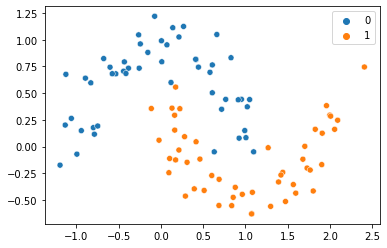

In [4]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=7)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rf_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(estimators = [('log', log_clf), ('rf', rf_clf), ('svm', svm_clf)], voting = 'hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('log', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svm', SVC())])

In [7]:
from sklearn.metrics import accuracy_score
for clf in [log_clf, rf_clf, svm_clf, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.86
RandomForestClassifier 0.9
SVC 0.9
VotingClassifier 0.9
